## Autour du Paradoxe de Simpson

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Les données traitées sont sur [gitlab](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false)

In [2]:
# On récupère les données grâce au module pandas au format CVS
datas = pd.read_csv("https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false")

On crée une fonction pour faire le compte des femmes fumeuses/non fumeuses, vivantes/mortes.

In [3]:
def nb_etat_datas(data):
    
    s_d  = 0 # smoker and dead
    s_l  = 0 # smoker and alive
    ns_d = 0 # not smoker and dead
    ns_l = 0 # not smoker and alive
    
    for st, sm in zip(data["Status"], data["Smoker"]):
        if st == "Alive" and sm == "Yes":
            s_l += 1
        elif st == "Alive" and sm == "No":
            ns_l += 1
        elif st == "Dead" and sm == "Yes":
            s_d += 1
        elif st == "Dead" and sm == "No":
            ns_d += 1
            
    return s_d,s_l,ns_d,ns_l

In [4]:
#nb_w    = nombre de femmes
# nb_s_d = nombre de fumeuses mortes
# nb_s_l = nombre de fumeuses vivantes
# nb_ns_d = nombre de non fumeuses mortes
# nb_ns_l = nombre de non fumeuses vivantes

nb_w                             = len(datas)
smoker_or_not                    = ["smoker", "not smoker"]
nb_s_d, nb_s_l, nb_ns_d, nb_ns_l = nb_etat_datas(datas)

In [5]:
live = pd.Series([nb_s_l, nb_ns_l], index = smoker_or_not)
dead = pd.Series([nb_s_d, nb_ns_d], index = smoker_or_not)
df = pd.DataFrame({"alive":live, "dead" : dead})

Voici le tableau du nombre total de femmes vivantes et décédées en fonction de leur tabagisme

In [6]:
df

alive  dead
smoker        443   139
not smoker    502   230

Voici le taux de mortalité chez les femmes fumeuses et non fumeuses

In [7]:
t_m_smoker  = nb_s_d/(nb_s_d + nb_s_l) # taux de mortalité chez les fumeuses
t_m_nsmoker = nb_ns_d/(nb_ns_d + nb_ns_l) # taux de mortalité chez les non fumeuses
print(f"Le taux de mortalité chez les femmes fumeuses est de    : {t_m_smoker : 0.2}")
print(f"Le taux de mortalité chez les femmes non fumeuse est de : {t_m_nsmoker : 0.2}")

Le taux de mortalité chez les femmes fumeuses est de    :  0.24
Le taux de mortalité chez les femmes non fumeuse est de :  0.31


Représentons les taux de mortalité calculés ci-dessus avec un histogramme

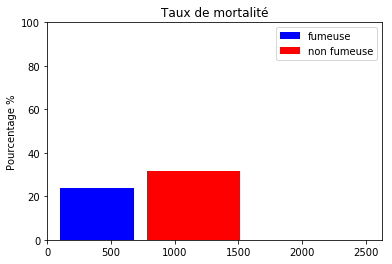

In [8]:
# J'ai décalé les éléments de fumeuse de longueur 582 et non fumeuses de longueur 732 pour bien espacer les bars 

plt.axis([0, 2*nb_w, 0, 100])
fumeuse     = list(range(100,nb_s_l+nb_s_d+101))
non_fumeuse = list(range(nb_s_l+nb_s_d+201, nb_ns_l+nb_ns_d + 202 + nb_s_l+nb_s_d))

width       = 1
height_s    = t_m_smoker * 100 * np.ones(len(fumeuse))
height_ns   = t_m_nsmoker * 100 * np.ones(len(non_fumeuse))

b_fumeuse   = plt.bar(fumeuse, height_s, width, color = "blue")
b_nfumeuse  = plt.bar(non_fumeuse, height_ns, width, color = "red")

plt.title("Taux de mortalité")
plt.ylabel("Pourcentage %")
leg         = plt.legend([b_fumeuse, b_nfumeuse], ['fumeuse', 'non fumeuse'])

D'après les calculs et les histogrammes ci-dessus, on remarque que les femmes qui fument vivent plus longtemps que les femmes qui ne fument pas. On peut conclure que fumer, c'est bon pour la santé.

Prenons en compte des tranches d'âge pour l'étude à savoir 18-34 ans, 34-54 ans, 55-64 ans et plus de 65 ans et mieux comprendre la conclusion précédente.

In [11]:
# On va considérer des tranches d'âges
def nb_etat_datas_v2(data):
    
    # classe 18 - 34 ans
    s_d_1834  = 0 # smoker and dead
    s_l_1834  = 0 # smoker and alive
    ns_d_1834 = 0 # not smoker and dead
    ns_l_1834 = 0 # not smoker and alive
    
    # classe 34 - 54 ans
    s_d_3454  = 0 # smoker and dead
    s_l_3454  = 0 # smoker and alive
    ns_d_3454 = 0 # not smoker and dead
    ns_l_3454 = 0 # not smoker and alive
    
    # classe 55 - 64 ans
    s_d_5564  = 0 # smoker and dead
    s_l_5564  = 0 # smoker and alive
    ns_d_5564 = 0 # not smoker and dead
    ns_l_5564 = 0 # not smoker and alive
    
    # classe 65 et plus
    s_d_65_p  = 0 # smoker and dead
    s_l_65_p  = 0 # smoker and alive
    ns_d_65_p = 0 # not smoker and dead
    ns_l_65_p = 0 # not smoker and alive
    
    for st, sm, age in zip(data["Status"], data["Smoker"], data["Age"]):
        if 18 <= age < 34:
            if st == "Alive" and sm == "Yes":
                s_l_1834 += 1
            elif st == "Alive" and sm == "No":
                ns_l_1834 += 1
            elif st == "Dead" and sm == "Yes":
                s_d_1834 += 1
            elif st == "Dead" and sm == "No":
                ns_d_1834 += 1
        elif 34 <= age <= 54:
            if st == "Alive" and sm == "Yes":
                s_l_3454 += 1
            elif st == "Alive" and sm == "No":
                ns_l_3454 += 1
            elif st == "Dead" and sm == "Yes":
                s_d_3454 += 1
            elif st == "Dead" and sm == "No":
                ns_d_3454 += 1
        elif 55 <= age <= 64:
            if st == "Alive" and sm == "Yes":
                s_l_5564 += 1
            elif st == "Alive" and sm == "No":
                ns_l_5564 += 1
            elif st == "Dead" and sm == "Yes":
                s_d_5564 += 1
            elif st == "Dead" and sm == "No":
                ns_d_5564 += 1
        elif age >= 65:
            if st == "Alive" and sm == "Yes":
                s_l_65_p += 1
            elif st == "Alive" and sm == "No":
                ns_l_65_p += 1
            elif st == "Dead" and sm == "Yes":
                s_d_65_p += 1
            elif st == "Dead" and sm == "No":
                ns_d_65_p += 1
            
    return (s_d_1834, s_l_1834, ns_d_1834, ns_l_1834),(s_d_3454, s_l_3454, ns_d_3454, ns_l_3454),(s_d_5564 ,s_l_5564 ,ns_d_5564 ,ns_l_5564),(s_d_65_p ,s_l_65_p ,ns_d_65_p ,ns_l_65_p)

La fonction nb_etat_datas_v2 est une version améliorée où l'on prend en compte des classes d'âges

In [10]:
classe_age = ["18-34", "34-54", "55-64", "65 et plus"]
data_1834, data_3454, data_5564, data_65_p = nb_etat_datas_v2(datas)

In [12]:
s_live  = pd.Series([data_1834[1], data_3454[1], data_5564[1], data_65_p[1]], index = classe_age) # fumeuse_vivante
ns_live = pd.Series([data_1834[3], data_3454[3], data_5564[3], data_65_p[3]], index = classe_age) # non fumeuse vivante
s_dead  = pd.Series([data_1834[0], data_3454[0], data_5564[0], data_65_p[0]], index = classe_age) # fumeuse morte
ns_dead = pd.Series([data_1834[2], data_3454[2], data_5564[2], data_65_p[2]], index = classe_age) # non fumeuse morte
df_v2   = pd.DataFrame({"smocker-alive": s_live,
                        "smocker-dead" : s_dead,
                       "not-smocker-alive" : ns_live, 
                       "not-smocker-dead": ns_dead}
                      )

Voici le nouveau tableau avec les tranches d'âges pris en considération

In [13]:
df_v2

not-smocker-alive  not-smocker-dead  smocker-alive  smocker-dead
18-34                     213                 6            174             5
34-54                     180                19            198            41
55-64                      81                40             64            51
65 et plus                 28               165              7            42

On peut remarquer que les femmes ayant plus 65 ans et ne fumant pas possèdent un taux de mortalité élevé par rapport aux autres
femmes de différentes classes d'âge; et la mortalité chez les fumeuses (hormis la dernière tranche d'âge) est élevée par rapport à celle chez les non fumeuses.
Voici un graphique illustrant de nouveau le problème posé (le couple bleu/rouge représente une classe d'âge par ordre croissant)

In [14]:
# On calcule les taux de mortalité pour les différentes classes d'âges en s'inspirant de ce qui a déjà été fait précédemment
t_m_s_1834  = data_1834[0] / (data_1834[0] + data_1834[1])
t_m_ns_1834 = data_1834[2] / (data_1834[2] + data_1834[3])

t_m_s_3454  = data_3454[0] / (data_3454[0] + data_3454[1])
t_m_ns_3454 = data_3454[2] / (data_3454[2] + data_3454[3])

t_m_s_5564  = data_5564[0] / (data_5564[0] + data_5564[1])
t_m_ns_5564 = data_5564[2] / (data_5564[2] + data_5564[3])

t_m_s_65_p  = data_65_p[0] / (data_65_p[0] + data_65_p[1])
t_m_ns_65_p = data_65_p[2] / (data_65_p[2] + data_65_p[3])

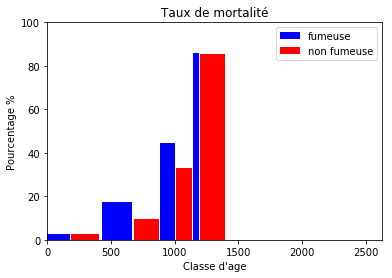

In [15]:
plt.axis([0, 2*nb_w, 0, 100])

# somme pour la classe 18-34 du nombre de fumeuse et de non fumeuse
in_f_1834 = data_1834[0] + data_1834[1]
in_nf_1834 = data_1834[2] + data_1834[3]

# somme pour la classe 34-54 du nombre de fumeuse et de non fumeuse
in_f_3454 = data_3454[0] + data_3454[1]
in_nf_3454 = data_3454[2] + data_3454[3]

# somme pour la classe 54-64 du nombre de fumeuse et de non fumeuse
in_f_5564 = data_5564[0] + data_5564[1]
in_nf_5564 = data_5564[2] + data_5564[3]

# somme pour la classe 65 et plus du nombre de fumeuse et de non fumeuse
in_f_65p = data_65_p[0] + data_65_p[1]
in_nf_65p = data_65_p[2] + data_65_p[3]

# classe 18 - 34
f_1834     = list(range(0, in_f_1834 + 1))
nf_1834    = list(range(in_f_1834 + 10, in_nf_1834 + in_f_1834 + 11))

s_1834 = in_nf_1834 + in_f_1834

# classe 34 - 54
f_3454     = list(range(s_1834 + 30, in_f_3454 + s_1834 + 31))
nf_3454    = list(range(in_f_3454 + s_1834 + 40, in_nf_3454 + in_f_3454 + s_1834 + 41))

s_3454 = in_nf_3454 + in_f_3454 + s_1834

# classe 55 - 64
f_5564     = list(range(s_3454 + 50, in_f_5564 + s_3454 + 51))
nf_5564    = list(range(in_f_5564 + s_3454 + 60, in_nf_5564 + in_f_5564 + s_3454 + 61))

s_5564 = in_nf_5564 + in_f_5564 + s_3454

# classe 65 et plus
f_65_p     = list(range(s_5564 + 70, in_f_65p + s_5564 + 71))
nf_65_p    = list(range(in_f_65p + s_5564 + 80, in_nf_65p + in_f_65p + s_5564 + 81))

width       = 1

# hauteurs pour la classe 18 - 34 
h_s_1834    = t_m_s_1834  * 100 * np.ones(len(f_1834))
h_ns_1834   = t_m_ns_1834 * 100 * np.ones(len(nf_1834))

# hauteurs pour la classe 34 - 54 
h_s_3454    = t_m_s_3454  * 100 * np.ones(len(f_3454))
h_ns_3454   = t_m_ns_3454 * 100 * np.ones(len(nf_3454))

# hauteurs pour la classe 55 - 64
h_s_5564    = t_m_s_5564  * 100 * np.ones(len(f_5564))
h_ns_5564   = t_m_ns_5564 * 100 * np.ones(len(nf_5564))

# hauteurs pour la classe 65 et plus
h_s_65p    = t_m_s_65_p  * 100 * np.ones(len(f_65_p))
h_ns_65p   = t_m_ns_65_p * 100 * np.ones(len(nf_65_p))

# On trace des bars pour chaque classe
b_f1834   = plt.bar(f_1834, h_s_1834, width, color = "blue")
b_nf1834  = plt.bar(nf_1834, h_ns_1834, width, color = "red")

b_f3454   = plt.bar(f_3454, h_s_3454, width, color = "blue")
b_nf3454  = plt.bar(nf_3454, h_ns_3454, width, color = "red")

b_f5564   = plt.bar(f_5564, h_s_5564, width, color = "blue")
b_nf5564  = plt.bar(nf_5564, h_ns_5564, width, color = "red")

b_f65p   = plt.bar(f_65_p, h_s_65p, width, color = "blue")
b_nf65p  = plt.bar(nf_65_p, h_ns_65p, width, color = "red")

plt.title("Taux de mortalité")
plt.xlabel("Classe d\'age")
plt.ylabel("Pourcentage %")
leg         = plt.legend([b_f1834, b_nf1834], ['fumeuse', 'non fumeuse'])